In [ ]:
#répartition lemmes pivot par époque

In [1]:
ep1 = "/home/port-pret-etu01/Documents/LATTICE/conllu/1810-1840.conllu"
ep2 = "/home/port-pret-etu01/Documents/LATTICE/conllu/1841-1913.conllu"
ep3 = "/home/port-pret-etu01/Documents/LATTICE/conllu/1914-2009.conllu"

In [2]:
def count_words_extrait(file, word):
    counter = 0
    search_term = f"# Pivot = {word}" 
    with open (file,"r") as f:
        content = f.readlines()
        for line in content:
            if line.strip() == search_term:
                counter += 1
        print(f"Number of extracts with '{word}' for {os.path.basename(file)} is: {counter}")

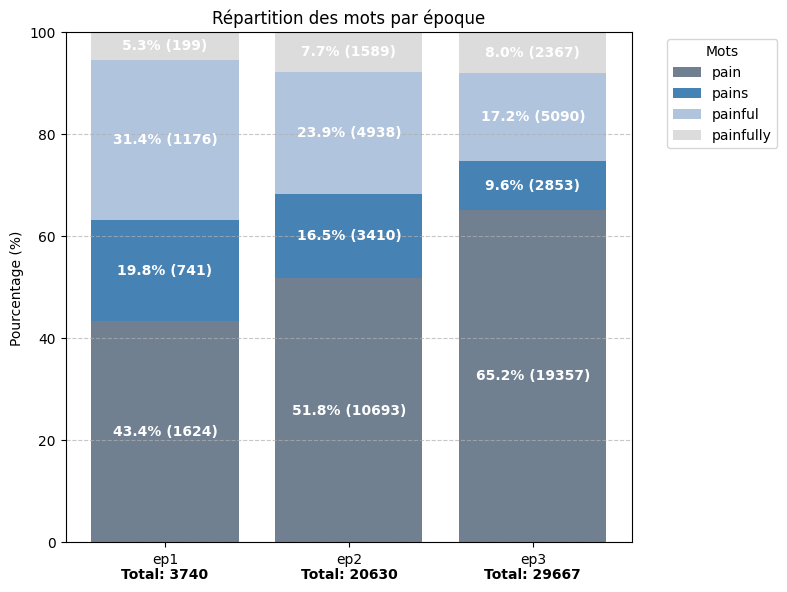

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def count_words_extrait(file, word):
    counter = 0
    search_term = f"# Pivot = {word}"
    
    with open(file, "r", encoding="utf-8") as f:
        for line in f:
            if line.strip() == search_term:
                counter += 1
    
    return counter

files = [ep1, ep2, ep3]
words = ["pain", "pains", "painful", "painfully"]
colors = ["slategray", "steelblue", "lightsteelblue", "gainsboro"]
results = {}

total_counts = {f"ep{i+1}": 0 for i in range(len(files))}

for file in files:
    file_name = f"ep{files.index(file) + 1}"
    results[file_name] = {}
    
    for word in words:
        count = count_words_extrait(file, word)
        results[file_name][word] = count
        total_counts[file_name] += count

df = pd.DataFrame.from_dict(results, orient="index")
df_percentage = df.div(df.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(8, 6))
bottom = [0] * len(files)

for i, word in enumerate(words):
    percentages = df_percentage[word].fillna(0)
    counts = df[word].fillna(0)
    
    bars = ax.bar(df.index, percentages, bottom=bottom, color=colors[i], label=word)
    
    for bar, pct, cnt in zip(bars, percentages, counts):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
                f"{pct:.1f}% ({int(cnt)})", ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    
    bottom = [b + p for b, p in zip(bottom, percentages)]

ax.set_ylabel("Pourcentage (%)")
ax.set_title("Répartition des mots par époque")
ax.set_ylim(0, 100)
ax.legend(title="Mots", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis="y", linestyle="--", alpha=0.7)

for i, (epoch, total) in enumerate(total_counts.items()):
    ax.text(i, -5, f"Total: {total}", ha='center', va='top', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig("/home/port-pret-etu01/Documents/LATTICE/images/distribution_mots_epoque.png")
plt.show()

In [4]:
#exporter le nb de lemmes
import json

with open("/home/port-pret-etu01/Documents/LATTICE/méta/output/total_pivot_counts.json", "w") as f:
    json.dump(results, f, indent=4)
